<a href="https://colab.research.google.com/github/Vipulmishra1/CR/blob/main/Commission_Reconciliation_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Title:
Commission Reconciliation Tool using Python

Project Goal:
Build an automated tool that helps reconcile commission reports from carrier portals with internal company data, flagging discrepancies and highlighting risk-prone partners.



 Step 1: Load the Data


In [6]:

import pandas as pd

# Load both datasets
internal_df = pd.read_csv("internal_data_large.csv")
commission_df = pd.read_csv("commission_data_large.csv")

# Preview the data
internal_df.head()


,Partner,Amount,Date
0,Partner G,1360,2025-04-15
1,Partner H,4272,2025-04-21
2,Partner G,966,2025-04-23
3,Partner H,3944,2025-04-04
4,Partner H,630,2025-04-22


Why this matters:
This is like fetching real commission reports from your internal ERP system and the carrier portals.

Step 2: Reconcile and Identify Discrepancies


# New Section

In [7]:
# Merge the two datasets on Partner and Date
merged_df = pd.merge(
    internal_df,
    commission_df,
    on=["Partner", "Date"],
    how="outer",
    suffixes=('_internal', '_external')
)

# Calculate discrepancies
merged_df['Discrepancy'] = merged_df['Amount_internal'] - merged_df['Amount_external']

# Filter rows where there's a mismatch
discrepancies = merged_df[merged_df['Discrepancy'] != 0]
discrepancies.head()


,Partner,Amount_internal,Date,Amount_external,Discrepancy
1,Partner A,3675,2025-04-01,1323,2352
2,Partner A,1323,2025-04-01,3675,-2352
8,Partner A,3824,2025-04-06,3074,750
9,Partner A,3824,2025-04-06,4915,-1091
10,Partner A,3051,2025-04-06,3824,-773


Purpose:
This part does the core logic—pinpoints mismatches in commissions that need to be reviewed or resolved.



Step 3: Visualize Top Partners by Discrepancy


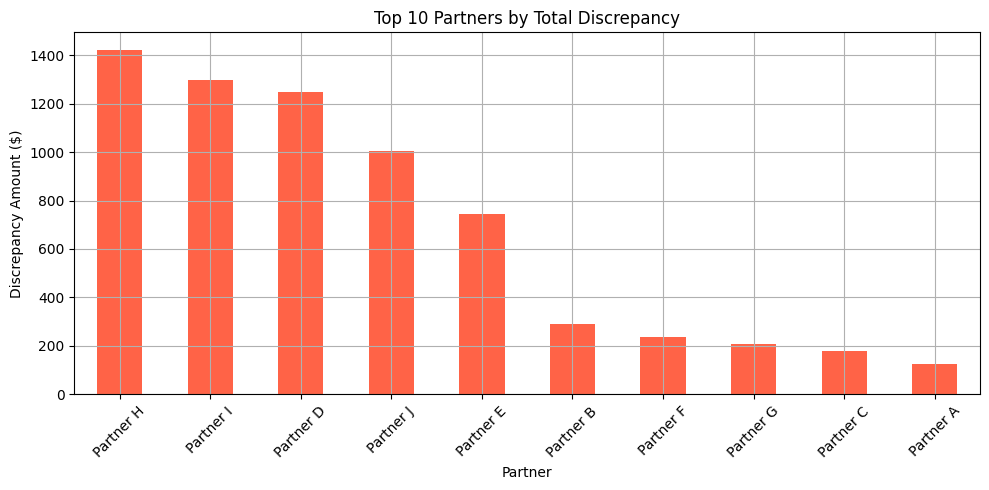

In [8]:
import matplotlib.pyplot as plt

# Summarize top 10 discrepancy partners
top_discrepancies = discrepancies.groupby("Partner")["Discrepancy"].sum().abs().sort_values(ascending=False).head(10)

# Plot
top_discrepancies.plot(kind='bar', figsize=(10, 5), color='tomato')
plt.title("Top 10 Partners by Total Discrepancy")
plt.ylabel("Discrepancy Amount ($)")
plt.xlabel("Partner")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


What It Tells Us:
The bar chart shows the top 10 partners with the largest aggregate mismatches between external and internal commission records.

A bar is one of the totals of mismatches (in dollars) for a single partner during the month.

Main Takeaways:
Partner H, I, and D are most problematic, all with mismatches valued at over $1200+.

These partners must be brought to special attention for follow-up by the AR or reconciliation team.

It helps to identify which external partners are contributing most to financial imbalances.

Step 4: Visualize Discrepancy Trends Over Time

<ipython-input-8-a97c8b82edda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrepancies["Date"] = pd.to_datetime(discrepancies["Date"])


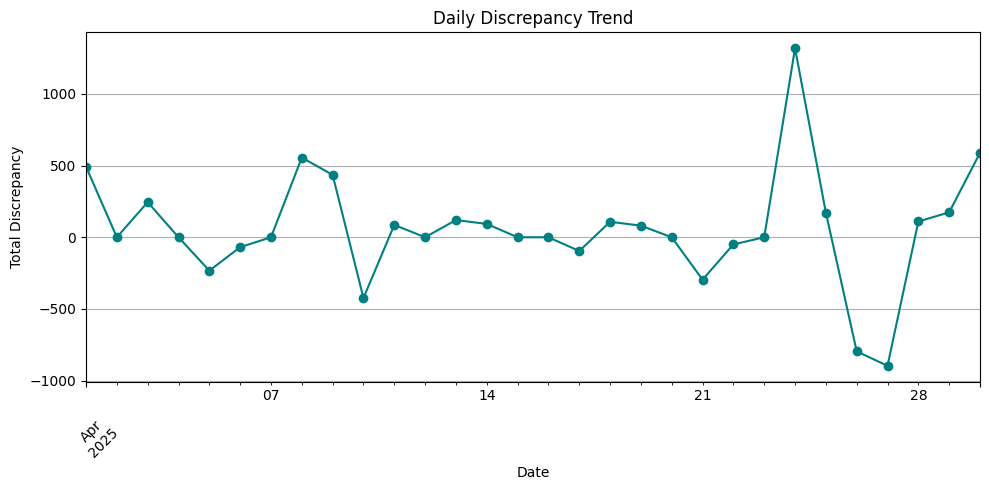

In [ ]:
# Convert date to datetime
discrepancies["Date"] = pd.to_datetime(discrepancies["Date"])

# Sum discrepancies by date
daily_discrepancy = discrepancies.groupby("Date")["Discrepancy"].sum()

# Plot trend
daily_discrepancy.plot(kind='line', figsize=(10, 5), marker='o', color='teal')
plt.title("Daily Discrepancy Trend")
plt.xlabel("Date")
plt.ylabel("Total Discrepancy")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What It Shows:
This line chart traces the daily total discrepancy amount for April 2025.
Positive values represent overreporting and negative values represent underreporting or missing commissions.

Key Insights:

There is a large spike around the 24th of April, indicating a large discrepancy event—a system error or bulk upload mistake, maybe.
The negative trough around April 27–28 indicates underreported values, maybe due to late statements.

This chart helps management decide if issues are one-off errors or consistent trends, towards better audit planning.



Use case:
Shows if errors peak during certain dates—maybe due to system issues or month-end rush.

 Step 5: Export Final Discrepancy Report

In [9]:
discrepancies.to_csv("discrepancy_report.csv", index=False)

from google.colab import files
files.download("discrepancy_report.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Why this step is critical:
Allows the finance team to investigate mismatches and document them.

 Conclusion
This project demonstrates a practical, hands-on application of Python for financial data reconciliation. By simulating real-world commission data from external partners and internal systems, the tool identifies discrepancies, visualizes key insights, and exports actionable reports for the finance team.

Key accomplishments include:

Automating the comparison of 500+ financial records

Identifying and quantifying mismatches across multiple partners and dates

Visualizing risk patterns using bar and line charts

Exporting final reports to support accurate financial decision-making




This tool not only streamlines the reconciliation process but also helps management make data-informed decisions by highlighting slow-paying or inconsistent partners.